# Notebook de práctica parte 1

Este notebook es sólo para que agarren práctica en Julia. No cuenta para la calificación, pero les servirá como una primera práctica. Luego subo un notebook más.  

Si se sienten ya expertos en Julia, tómenlo como un auto-test ;-)!!

# Operaciones básicas

Esta sección se trata de usar Julia como una calculadora. Notarás que con un poco de ingenio, sin usar nada tan especial puedes hacer cálculos bastante sofisticados. 

Haz los siguientes ejercicios **sin usar ciclos, condicionales, funciones, ni paqueterías excepto LinearAlgebra.** 

[1] Comienza por hacer varias operaciones sencillas. Suma, resta, multiplica, divide y saca potencias de números flotantes, números complejos, fracciones, etc... También prueba qué pasa con funciones trigonométricas, la exponencial, etc. 

In [1]:
1+2, 3/2, 9*9, (2 +7im)*2im

(3, 1.5, 81, -14 + 4im)

[2] Ahora prueba hacer las mismas operaciones, pero con listas de números y con matrices en vez de con números. Utiliza "." para poder mapear la operación sobre todos los valores de las listas. Compara qué sucede si no se utiliza el ".". 

¿Cuál es la diferencia entre sin.(A) y sin(A) si A es una matriz?

In [2]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [3]:
sin(A)

3×3 Matrix{Float64}:
 -0.692791  -0.23059     0.231611
 -0.172432  -0.143353   -0.114274
  0.347927  -0.0561161  -0.460159

In [4]:
sin.(A)

3×3 Matrix{Float64}:
  0.841471   0.909297   0.14112
 -0.756802  -0.958924  -0.279415
  0.656987   0.989358   0.412118

[3] Obtén el valor de $$ \sum_{i = 0}^{10,000,000} \frac{4(-1)^i}{2i+1}$$ ¿Lo reconoces? 

In [5]:
using LinearAlgebra, Plots

In [6]:
arr = collect(0:1:10^8)

100000001-element Vector{Int64}:
         0
         1
         2
         3
         4
         5
         6
         7
         8
         9
        10
        11
        12
         ⋮
  99999989
  99999990
  99999991
  99999992
  99999993
  99999994
  99999995
  99999996
  99999997
  99999998
  99999999
 100000000

In [7]:
function my_sum(x::Int)
    s1 = 4*(-1)^(x % 2)
    s2 = 2*x + 1
    s3 = s1/s2
end

function my_sum(x::Vector{Int})
    sum(my_sum.(x))
end

my_sum (generic function with 2 methods)

In [8]:
my_sum(arr)

3.141592663589793

In [9]:
π

π = 3.1415926535897...

In [10]:
8 % 2

0

[4] Resuelve el siguiente sistema de ecuaciones lineales: 

$$ 2x+y-z = 5 $$
$$ x-y+z = 3 $$
$$ -x-y-z = 0 $$

usa la paquetería **LinearAlgebra**

hint: Hay varias formas de resolver el sistema, la más eficiente es usar el operador "\ ".

In [11]:
B = [2  1 -1; 
     1 -1  1; 
    -1 -1 -1//1]
c = [5, 3, 0//1]
B\c

3-element Vector{Rational{Int64}}:
  8//3
 -3//2
 -7//6

[5] Descompon la matriz del sistema de ecuaciones anteriores en valores singulares (si no sabes qué es eso revisa: https://en.wikipedia.org/wiki/Singular_value_decomposition). 

Obtén además los eigenvectores de las matrices unitarias de la descomposición (¿Qué representan los eigenvectores que se forman de sólo valores reales?)

In [12]:
?svd

search: svd svd! SVD svdvals svdvals! GeneralizedSVD isvalid CholeskyPivoted



```
svd(A; full::Bool = false, alg::Algorithm = default_svd_alg(A)) -> SVD
```

Compute the singular value decomposition (SVD) of `A` and return an `SVD` object.

`U`, `S`, `V` and `Vt` can be obtained from the factorization `F` with `F.U`, `F.S`, `F.V` and `F.Vt`, such that `A = U * Diagonal(S) * Vt`. The algorithm produces `Vt` and hence `Vt` is more efficient to extract than `V`. The singular values in `S` are sorted in descending order.

Iterating the decomposition produces the components `U`, `S`, and `V`.

If `full = false` (default), a "thin" SVD is returned. For an $M \times N$ matrix `A`, in the full factorization `U` is $M \times M$ and `V` is $N \times N$, while in the thin factorization `U` is $M \times K$ and `V` is $N \times K$, where $K = \min(M,N)$ is the number of singular values.

If `alg = DivideAndConquer()` a divide-and-conquer algorithm is used to calculate the SVD. Another (typically slower but more accurate) option is `alg = QRIteration()`.

!!! compat "Julia 1.3"
    The `alg` keyword argument requires Julia 1.3 or later.


# Examples

```jldoctest
julia> A = rand(4,3);

julia> F = svd(A); # Store the Factorization Object

julia> A ≈ F.U * Diagonal(F.S) * F.Vt
true

julia> U, S, V = F; # destructuring via iteration

julia> A ≈ U * Diagonal(S) * V'
true

julia> Uonly, = svd(A); # Store U only

julia> Uonly == U
true
```

---

```
svd(A, B) -> GeneralizedSVD
```

Compute the generalized SVD of `A` and `B`, returning a `GeneralizedSVD` factorization object `F` such that `[A;B] = [F.U * F.D1; F.V * F.D2] * F.R0 * F.Q'`

  * `U` is a M-by-M orthogonal matrix,
  * `V` is a P-by-P orthogonal matrix,
  * `Q` is a N-by-N orthogonal matrix,
  * `D1` is a M-by-(K+L) diagonal matrix with 1s in the first K entries,
  * `D2` is a P-by-(K+L) matrix whose top right L-by-L block is diagonal,
  * `R0` is a (K+L)-by-N matrix whose rightmost (K+L)-by-(K+L) block is          nonsingular upper block triangular,

`K+L` is the effective numerical rank of the matrix `[A; B]`.

Iterating the decomposition produces the components `U`, `V`, `Q`, `D1`, `D2`, and `R0`.

The generalized SVD is used in applications such as when one wants to compare how much belongs to `A` vs. how much belongs to `B`, as in human vs yeast genome, or signal vs noise, or between clusters vs within clusters. (See Edelman and Wang for discussion: https://arxiv.org/abs/1901.00485)

It decomposes `[A; B]` into `[UC; VS]H`, where `[UC; VS]` is a natural orthogonal basis for the column space of `[A; B]`, and `H = RQ'` is a natural non-orthogonal basis for the rowspace of `[A;B]`, where the top rows are most closely attributed to the `A` matrix, and the bottom to the `B` matrix. The multi-cosine/sine matrices `C` and `S` provide a multi-measure of how much `A` vs how much `B`, and `U` and `V` provide directions in which these are measured.

# Examples

```jldoctest
julia> A = randn(3,2); B=randn(4,2);

julia> F = svd(A, B);

julia> U,V,Q,C,S,R = F;

julia> H = R*Q';

julia> [A; B] ≈ [U*C; V*S]*H
true

julia> [A; B] ≈ [F.U*F.D1; F.V*F.D2]*F.R0*F.Q'
true

julia> Uonly, = svd(A,B);

julia> U == Uonly
true
```


In [13]:
F = svd(B)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
3×3 Matrix{Float64}:
 -0.879367  -0.326451  -0.346619
 -0.114102   0.851235  -0.51223
  0.462272  -0.410888  -0.785797
singular values:
3-element Vector{Float64}:
 2.6554423815498307
 1.8661982625090223
 1.2107558809591914
Vt factor:
3×3 Matrix{Float64}:
 -0.879367  -0.462272  0.114102
  0.326451  -0.410888  0.851235
 -0.346619   0.785797  0.51223

In [14]:
U, S, V = F; # destructuring via iteration
round.(eigen(U).vectors; digits=3)

3×3 Matrix{ComplexF64}:
 -0.702-0.0im    -0.702+0.0im     -0.12+0.0im
 -0.082-0.18im   -0.082+0.18im     0.96+0.0im
  0.022-0.684im   0.022+0.684im  -0.252+0.0im

In [15]:
round.(eigen(V).vectors; digits=3)

3×3 Matrix{ComplexF64}:
 0.705-0.0im    0.705+0.0im    -0.071+0.0im
 0.025-0.611im  0.025+0.611im   0.503+0.0im
 0.044+0.357im  0.044-0.357im   0.861+0.0im

Obtén además los eigenvectores de las matrices unitarias de la descomposición (¿Qué representan los eigenvectores que se forman de sólo valores reales?)

#### Los eigenvectores de valores únicamente reales representan una rotación $\theta$ respecto al origen.

____________________

[6] Los números duales son de la forma $x = a + b\epsilon$ donde $\epsilon$ es un número (no real) con la propiedad $\epsilon^2 = 0$. Algo similar a lo que sucede con los números complejos, donde cada número complejo se puede escribir de la forma $a+bi$ donde $i$ tiene la propiedad $i^2 = -1$. 

Por lo tanto $x^2 = a^2+ 2ab\epsilon$ y en general $x^n = a^n + na^{n-1} b \epsilon$, pues todas las potencias mayores a $1$ de $\epsilon$ se vuelven 0. Esto implica que un polinomio $P_n(x) = p_n x^n+\dots + p_1 x + p_0 = p_n (a^n + na^{n-1} b \epsilon)+\dots+ p_1 (a + b\epsilon) + p_0 = P_n(a)+P'_n(b)\epsilon$. Es decir, cualquier polinomio (y por lo tanto cualquier función que se pueda descomponer en su polinomio de Tylor) aplicado a un número dual nos arroja un número dual conformado por el polinomio (función) aplicado a la parte real del número + la diferencial del polinomio (función) aplicado a la parte diferencial del número multiplicado por $\epsilon$. 

Podemos ver los números duales como matrices de la forma:

$$
x = 
\begin{pmatrix}
a & b\\
0 & a
\end{pmatrix}
$$

donde $a$ representa la parte real y $b$ la parte diferencial. Al elevar al cuadrado $x$, tendremos en la diagonal $a^2$ y en la esquina superior derecha $2ab$, cumpliendo con la regla de diferenciación. Por lo tanto, podemos obtener la derivada de una función evaluada en $a$, aplicando la función a la matriz:

$$
\dot{x}(a) = 
\begin{pmatrix}
a & 1\\
0 & a
\end{pmatrix}
$$

y quedándonos con el valor de la esquina superior derecha de la matriz. 

Usando esto, obtén la derivada (automática) de $\sin(x)$ evaluado en 1.5, $\tan(\exp(1/x))$ evaluado en 2 y $\frac{x^3-\sinh(x)}{\sqrt{\cos^2(x)-\sec(x)}}$ evaluado en 3




In [16]:
# using Pkg
# Pkg.add("TaylorSeries")

In [17]:
using TaylorSeries
x = Taylor1(6)
dx = Taylor1(2)
a, b = set_variables("a b", order=10)

displayBigO(false);

In [18]:
function epsilon()
    [0 1 ; 0 0]
end

function dual(a::Number,b::Number)
    a*I(2) + b*epsilon()
end 

function diff_dual(d)
    t = d[1,2]
end

diff_dual(dual(10,1)^2)
(dual(10,1)^2)[1,2]

20

### Primera función: 
$$ f_1(x)=\sin(x),\qquad\ x=1.5$$

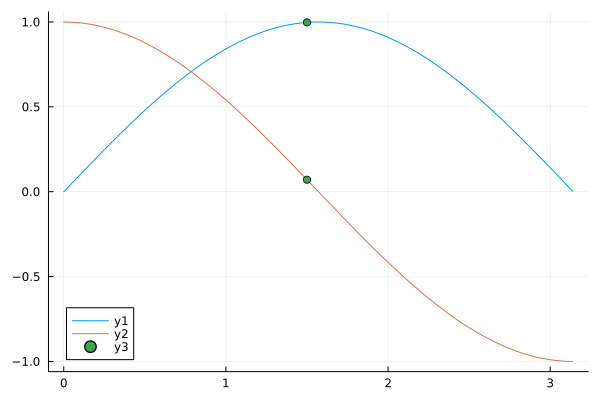

In [19]:
gr()
using Plots
plot(0:0.01:π, [sin, cos])
scatter!([1.5, 1.5], [sin(1.5), cos(1.5)])

In [20]:
diff_dual(sin(dual(1.5,1)))

0.07073720166770286

In [21]:
cos(1.5)

0.0707372016677029

In [22]:
evaluate(differentiate(sin(a)), [1.5,1])

0.0707528250558036

### Segunda función
$$ f_2(x) = \tan(e^{1/x}),\qquad\ x=2$$

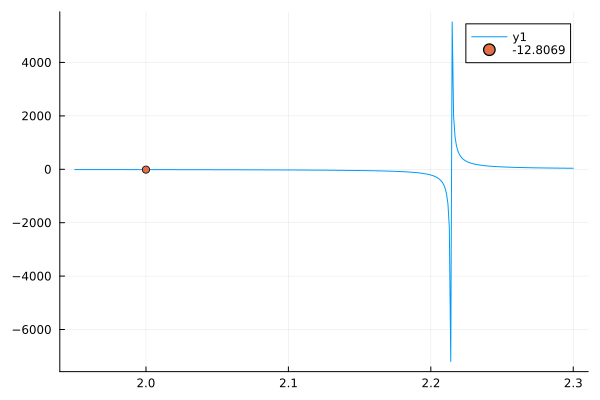

In [23]:
X = 1.95:0.001:2.3
Y = tan.(exp.(1 ./X))
s = round(tan(exp(1/2)), digits=4)

plot(X, Y)
scatter!([2], [s], label="$s")

Debido a que 

$$\frac{1}{x} = \frac{1}{a+b\varepsilon} = \frac{1}{a+b\varepsilon}\left(\frac{a-b\varepsilon}{a-b\varepsilon}\right)=  \frac{a-b\varepsilon}{a^2} =\frac{1}{a} - \frac{b}{a^2}\varepsilon$$

es decir que definimos que

$$ x^{-1} = \frac{1}{a}\begin{pmatrix}1 & -\frac{b}{a}\varepsilon\\ 0 & 1\end{pmatrix}$$

In [24]:
function div_dual(x::Matrix, y::Matrix) 
    a, b = x[1,1], x[1,2]
    c, d = y[1,1], y[1,2]
    dual(a/c, (b*c - a*d)/c^2)
end

function div_dual(x::Number, y::Matrix) 
    c, d = y[1,1], y[1,2]
    x*dual(1/c, -d/c^2)
end

div_dual (generic function with 2 methods)

In [25]:
diff_dual(tan(exp(div_dual(1,dual(2, 1)))))

-68.01637561599418

In [26]:
diff(tan.(exp.(1 ./[1.9999, 2.0001])))/(2.0001-1.9999)

1-element Vector{Float64}:
 -68.01639038160748

### Tercera función

$$f_3(x) = \frac{x^3-\sinh(x)}{\sqrt{\cos^2(x)-\sec(x)}},\qquad\ x=3$$

In [27]:
x = dual(3,1)
diff_dual((x^3-sinh(x))/sqrt(cos(x)^2-sec(x)))

11.592862366164674

In [28]:
xx = [3-0.00001, 3+0.00001]
diff((xx.^3-sinh.(xx)) ./sqrt.(cos.(xx).^2-sec.(xx)))/diff(xx)

1×1 Matrix{Float64}:
 11.592862366351477

[7] Usa notación compacta (es decir, de la forma [i^2 for i in 1:100] para escribir el conjunto $\{i^2 | i \in \{1,2,\dots, 100\}\}$) para hacer un arreglo de $10^6$ elementos, de $0$'s y $1$'s, donde el elemento $i$ del arrego sea 1 si $i$ es un número primo o $1$ y $0$ en otro caso. No puedes crear funciones y debe ser una sola línea de código.

Obtén (en otra línea) con este resultado cuántos números primos hay entre uno y un millón.  

In [29]:
using Primes; primos = [(isprime(i) ? 1 : 0) for i in 1:10^6]

1000000-element Vector{Int64}:
 0
 1
 1
 0
 1
 0
 1
 0
 0
 0
 1
 0
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [30]:
sum(primos)

78498

# Funciones  y condicionales

Julia se compone de objetos (sugetos de las oraciones) y funciones (los verbos). Más adelante veremos cómo hacer objetos, por ahora utilizaremos los que tiene pre-existentes Julia para hacer funciones que los operen. 

En general, a la hora de programar, conviene tener funciones pequeñas (1-20 líneas). Hay algunas excepciones, pero si una función tienen más de 20 líneas es probablemente porque debían descomponerla en varias funciones más pequeñas. Parte de la elegancia al programar, es justamente descomponer todo en funciones pequeñas. Así que cada vez que tengan más de 20 líneas de código en una función, pregúntense si no pueden descomponerla en varias funciones con menos código.

En esta sección practicarán el hacer varias funciones. En lo que sigue **eviten utilizar ciclos para sus definiciones**, eso vendrá en la siguiente sección. 

[1] Haz una función que calcule el número de primos menores que $x$, con $x$ un número real cualquiera. Utiliza lo que hiciste en el ejercicio 7.

In [31]:
function primos_menores_que(x::Number)
    x = floor(x)
    sumita = [(isprime(Int(i)) ? 1 : 0) for i in 1:x] 
    sum(sumita)
end

primos_menores_que (generic function with 1 method)

In [32]:
primos_menores_que(5.9)

3

[2] Haz una función que calcule el número de primos relativos a $i$ y menores que $i$, donde $i$ es un número entero positivo. Es decir, haz la función $\phi$ de Euler de los números primos. 

In [33]:
function primos_relativos(i::Int)
    (i<1) ? println("No es un número entero positivo") : 
    println("turip ip ip ip")
end

primos_relativos (generic function with 1 method)

In [34]:
primos_relativos(1)

turip ip ip ip


[3] Haz una función que tenga como argumentos una función $f$ y un valor real $x$ y que usando los números duales calcule  $\frac{df(x)}{dx}$. 

In [35]:
function auto_diff(f, X, dX)
    x, y = X
    dx, dy = normalize(dX)
    x_dual = dual(x, dx)
    y_dual = dual(y, dy)
    meow = f(x_dual, y_dual)
    meow[1][1,2], meow[2][1,2]
end

auto_diff (generic function with 1 method)

[4] Utiliza la función anterior para obtener la derivada parcial de una función vectorial con respecto a una variable. También obten el Jacobiano y el gradiente. 

$$ F(x,y) = \left(\sin(x)+\cos(y)\right)\hat{i} - \sqrt{x^2+y^2}\hat{j} $$

In [36]:
f(x,y) = [sin.(x)+cos.(y), -sqrt.(x .^2+y .^2)];

In [37]:
auto_diff(f, [1,1], [0.7071,0.7071])

(1.4098815361556927, -1.0)

In [38]:
function jacobiano(f, X)
    J = [0 0.; 0 0]
    J[1,1], J[2,1] = auto_diff(f, X, [1, 0])[1], auto_diff(f, X, [1, 0])[2] 
    J[1,2], J[2,2] = auto_diff(f, X, [0, 1])[1], auto_diff(f, X, [0, 1])[2]
    J
end

jacobiano (generic function with 1 method)

In [39]:
jacobiano(f, [1,1])

2×2 Matrix{Float64}:
  1.84147   0.540302
 -1.0      -1.0

[5] (en este ejercicio usarás el condicional if) Una forma efectiva (la más efectiva) de aproximar los números irracionales es mediante fracciones continuas, es decir, fracciones de la forma $x = a_0+\frac{1}{a_1+\frac{1}{a_2 +\dots}}$. Así, estas fracciones se pueden escribir usando la lista de los $a_i$. En el caso de los números irracionales, esta lista es infinita, pero se puede aproximar por los primeros $n$ elementos y con ello obtener una fracción que aproxime bien al irracional. Por ejemplo, $\sqrt{2} = [1,2,2,2,2,2,\dots]\sim [1,2,2,2] = \frac{17}{12} \sim 1.41667$. 
 
Para obtener la fracción continua, notemos que al restar el valor de $a_0$, que es simplemente la parte entera del número, al número del que queremos obtener su fracción continua, tenemos una fracción de la froma $\frac{1}{a_1+\frac{1}{a_2+\dots}}$. Al sacar el inverso de esto tenemos otra vez una fracción de la forma $a_1+\frac{1}{a_2+\frac{1}{a_3 +\dots}}$, así que podemos volver a obtener $a_1$ simplemente con la parte entera. Repitiendo esto $n$ veces, podemos obtener los primeros $n$ elementos de la fracción continua. 

Haz una función que dado un número, el número y el número de iteraciones, arroje la fracción continua aproximada (la lista de $a$'s) con $n$ valores. También haz una función que dada la lista, regrese la fracción reducida correspondiente a la fracción continua aproximada (utiliza racionales).  

Con estas funciones obtén las primeras 10 aproximaciones (en formato de fracción) a $\pi$ (utiliza notación compacta para obtenerlas). 

In [40]:
function nested_fraction(x; iter=10)
    array = Vector{Int}()
    for i in 1:1:iter
        temp = Int(floor(x))
        push!(array, temp)
        x = (x - temp)^(-1)
    end
    array
end

nested_fraction (generic function with 1 method)

In [41]:
pi

π = 3.1415926535897...

In [42]:
nested_fraction(pi; iter =10)

10-element Vector{Int64}:
   3
   7
  15
   1
 292
   1
   1
   1
   2
   1

[6] Un mapeo es una función tal que $f:I\rightarrow I$. Entre los mapeos en los reales, es interesante encontrar tanto puntos fijos, como ciclos límite. Por ejemplo, en el mapeo logístico $f(x) = rx(1-x)$ que va del intervalo $[0,1]$ al intervalo $[0,1]$ si $r\in [0,4]$, nos interesa saber a qué valores se llega después de aplicar muchas veces el mapeo, es decir queremos responde ¿$f^\inf(x)$ exite? y si existe ¿qué valor es? (¿depende de x?). Para algunos valores de $r$ este valor existe y es "casi" independiente de $x$, para otros valores no existe, pero en cambio existe un ciclo límite, es decir, después de muchas iteraciones, los valores de $f^n(x)$ se repiten cada $m$ iteraciones. 

Haz una función que dado $n$, $r$ y $x$, obtenga $f^n(x)$ con $f$ el mapeo logístico.

In [43]:
function f_maplog(x::Number; r=1, n=1)::Number 
    for i in 1:1:n
        x = r*x*(1-x)
    end
    x
end

function f_maplog(x::Matrix; r=1, n=1)::Matrix 
    for i in 1:1:n
        x = r*x*(1 .- x)
    end
    x
end

f_maplog (generic function with 2 methods)

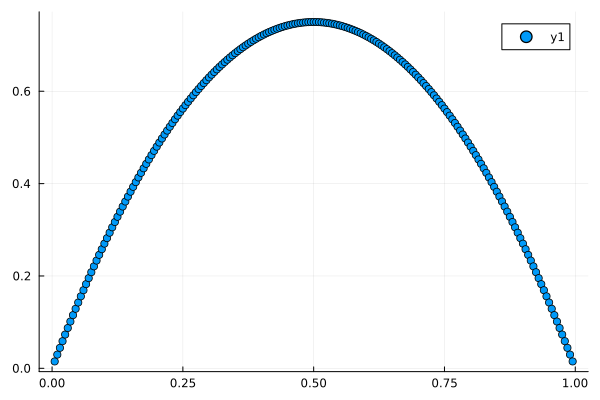

In [44]:
x = 0.005:0.005:0.995
scatter(x, f_maplog.(x; n=1, r=3.0))

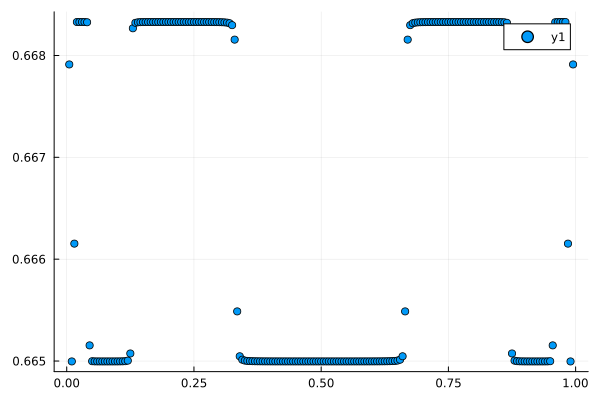

In [45]:
x = 0.005:0.005:0.995
scatter(x, f_maplog.(x; n=20000, r=3.0))

[7] Como vimos en el ejercicio anterior, algunos mapeos se pueden iterar para obtener la solución de la ecuación $f(x) = x$, que es un punto fijo de dicho mapeo. Esta propiedad se puede usar para generar un algoritmo que resuelva cualquier ecuación algebráica de la forma $f(x) = 0$. El truco para encontrar el mapeo adecuado consiste en aproximar la función $f$ al rededor de $x$ por su recta tangente. Encontrar la solución de la intersección de una recta con el eje $x$ es sencillo (y lo podemos hacer analíticamente), así que como una primera aproximación a la solución de $f(x) = 0$ obtenemos esa intersección, lo que nos acercará (normalmente) al valor de la solución real. El mapeo que obtiene la recta tangente a $f$ al rededor de $x$ y que después obtiene la intersección con el eje $x$ es el mapeo que buscamos. Iterando este mapeo, podemos llegar a un punto fijo $x_\inf$ que es justamente una solución a $f(x) = 0$. Este es el algoritmo Newton-Raphson. 

Utiliza esta idea para hacer una función que obtenga la solución de la ecuación $f(x) = 0$, dado $f$, una adivinanza inicial $x = x_0$ y una tolerancia, prefijada en $0.001$. La tolerancia representa la distancia entre la solución a la ecuación y el valor obtenido. 

________
En este caso queremos que $rx(1-x)=x$ por lo que definimos la función $f$ tal que 

$$f(x)=rx(1-x) - x.$$

In [67]:
1>1

false

In [85]:
function newton_raphson(f, x_0; tol=0.001, _args=nothing)
    dx = 1
    if _args != nothing
        f1 = x -> f(x; n=_args[1], r=_args[2]) - x
    else
        f1 = x -> f(x) - x
    end
    while abs(dx) > tol 
        x = dual(x_0, 1)
        dx = f1(x_0)/diff_dual(f1(x))
#         println("x_0 = ",round(x_0, sigdigits=3), ",\t dx = ",round(dx, sigdigits=5))
        x_0 -= dx
    end
    x_0
end

newton_raphson (generic function with 1 method)

In [95]:
x_0 = 0.09; 
_args = [2, 1];  # n, r
newton_raphson(f_maplog, x_0; tol=10e-3, _args=_args)

0.004948785582106851

[8] Generaliza la función anterior para que tu solucionador pueda resolver sistemas de ecuaciones algebráicas no lineales.  

In [49]:
g(x) = x ^2 
# newton_raphson(g, 10; tol=0.0001)

g (generic function with 1 method)